In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

## Data Preprocessing

In [6]:
df = pd.read_csv("Amrita-University-English-pageview.csv")
print(df.columns)
print(df.head())

Index(['Date', 'Amrita Vishwa Vidyapeetham'], dtype='object')
         Date  Amrita Vishwa Vidyapeetham
0  2015-07-01                         165
1  2015-07-02                         203
2  2015-07-03                         131
3  2015-07-04                         103
4  2015-07-05                         112


In [7]:
df.dtypes

Date                          object
Amrita Vishwa Vidyapeetham     int64
dtype: object

In [8]:
print("Dtype:", df['Date'].dtypes)
df['Date'] = pd.to_datetime(df['Date'])
print("Dtype now:", df['Date'].dtypes)

Dtype: object
Dtype now: datetime64[ns]


In [9]:
df.columns= ['Date', 'English']
df.index = df['Date']
df = df[['English']]

In [10]:
df2 = pd.read_csv("Amrita-University-Tamil-pageview.csv")
df2['Date'] = pd.to_datetime(df2['Date'])
df2.columns= ['Date', 'Tamil']
df2.index = df2['Date']
df2 = df2[['Tamil']]

In [11]:
df.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25',
               '2022-11-26', '2022-11-27', '2022-11-28', '2022-11-29',
               '2022-11-30', '2022-12-01'],
              dtype='datetime64[ns]', name='Date', length=2711, freq=None)

In [12]:
df.index = pd.date_range(start = '1/July/2015', end = '1/Dec/2022', freq='D')
df2.index = pd.date_range(start = '1/July/2015', end = '1/Dec/2022', freq='D')

In [13]:
df = pd.concat([df,df2], axis=1)

In [14]:
df.columns

Index(['English', 'Tamil'], dtype='object')

In [15]:
df.shape

(2711, 2)

In [16]:
print(df.isna().sum())
df.fillna(0, inplace=True)

English    0
Tamil      0
dtype: int64


<AxesSubplot:>

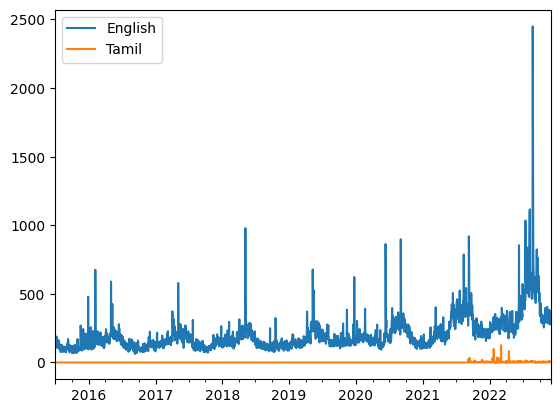

In [17]:
df.plot()

## Exploring Time Series Data

In [18]:
print(df.head(5))
print(df.tail(5))

            English  Tamil
2015-07-01      165      0
2015-07-02      203      0
2015-07-03      131      0
2015-07-04      103      0
2015-07-05      112      0
            English  Tamil
2022-11-27      277      3
2022-11-28      321      3
2022-11-29      319      2
2022-11-30      330      3
2022-12-01      333      4


In [19]:
print("No of Rows:", len(df))
print("Start Date:", df.index.min())
print("End Date:", df.index.max())

No of Rows: 2711
Start Date: 2015-07-01 00:00:00
End Date: 2022-12-01 00:00:00


In [21]:
print(df['01-2022'])

            English  Tamil
2022-01-01      177      2
2022-01-02      243      0
2022-01-03      295      4
2022-01-04      269      2
2022-01-05      254      2
2022-01-06      241      0
2022-01-07      242      2
2022-01-08      234      2
2022-01-09      218      4
2022-01-10      272      5
2022-01-11      274      3
2022-01-12      249      2
2022-01-13      262      5
2022-01-14      232      7
2022-01-15      221     28
2022-01-16      255      1
2022-01-17      273      3
2022-01-18      292      3
2022-01-19      293      1
2022-01-20      287      3
2022-01-21      326      4
2022-01-22      265      2
2022-01-23      299     98
2022-01-24      333      3
2022-01-25      288      3
2022-01-26      236      3
2022-01-27      285      2
2022-01-28      319      6
2022-01-29      333      5
2022-01-30      290      0
2022-01-31      354      6


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_18748\3676524725.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(df['01-2022'])


<AxesSubplot:>

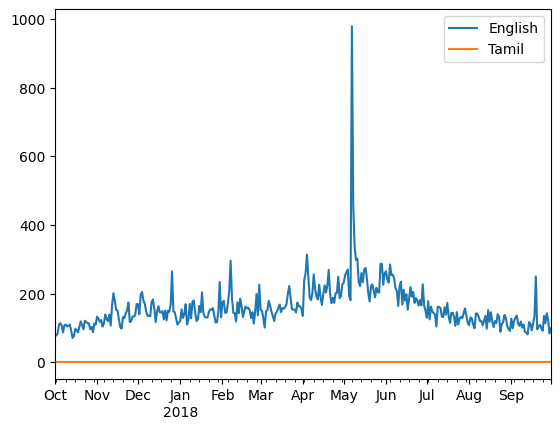

In [38]:
df['Oct-2017':'Sep-2018'].plot()

In [20]:
df.loc[:, ('English')]

2015-07-01    165
2015-07-02    203
2015-07-03    131
2015-07-04    103
2015-07-05    112
             ... 
2022-11-27    277
2022-11-28    321
2022-11-29    319
2022-11-30    330
2022-12-01    333
Freq: D, Name: English, Length: 2711, dtype: int64

<AxesSubplot:>

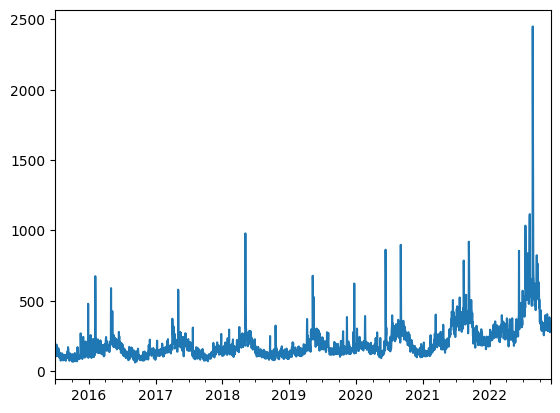

In [39]:
df.loc[:, ('English')].plot()

## DateTime Features

In [41]:
tsdf = df[['English']].copy()
print("TSDF Dtypes:", tsdf.dtypes)
tsdf['month'] = [tsdf.index[i].month for i in range(len(tsdf))]
tsdf['day'] = [tsdf.index[i].day for i in range(len(tsdf))]
print("Columns:", tsdf.columns)
print(tsdf.head())

TSDF Dtypes: English    int64
dtype: object
Columns: Index(['English', 'month', 'day'], dtype='object')
            English  month  day
2015-07-01      165      7    1
2015-07-02      203      7    2
2015-07-03      131      7    3
2015-07-04      103      7    4
2015-07-05      112      7    5


          English
month            
1      163.755760
2      182.171717
3      185.728111
4      204.971429
5      232.414747
6      254.395238
7      243.657258
8      255.733871
9      239.033333
10     170.495968
11     172.262500
12     153.068807


<AxesSubplot:xlabel='month'>

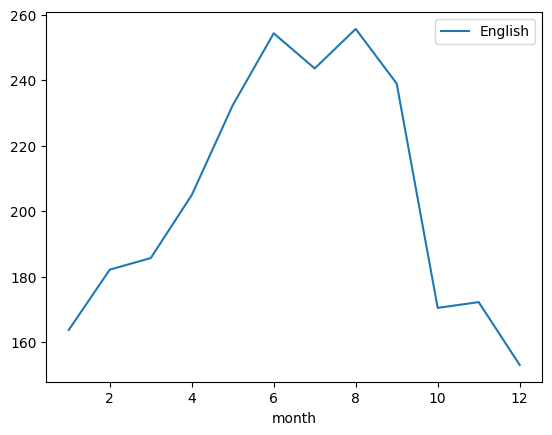

In [81]:
print(tsdf[['month','English']].groupby(['month']).mean())
tsdf[['month','English']].groupby(['month']).mean().plot()

       English
month         
1          354
2          675
3          402
4          376
5          979
6          863
7         1034
8         2449
9          920
10         433
11         405
12         623


<AxesSubplot:xlabel='month'>

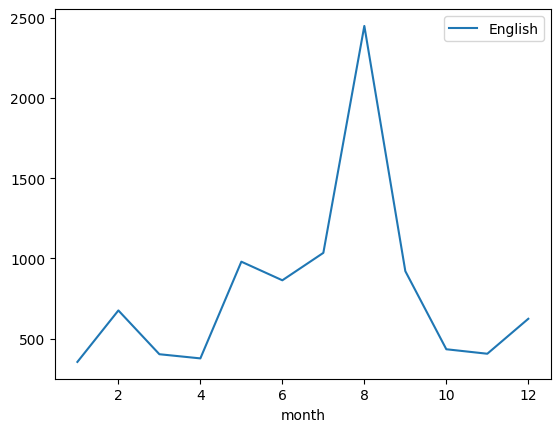

In [82]:
print(tsdf[['month','English']].groupby(['month']).max())
tsdf[['month','English']].groupby(['month']).max().plot()

      English
0  213.253230
1  210.457364
2  216.912371
3  213.474227
4  210.467700
5  190.842377
6  182.811370


<AxesSubplot:>

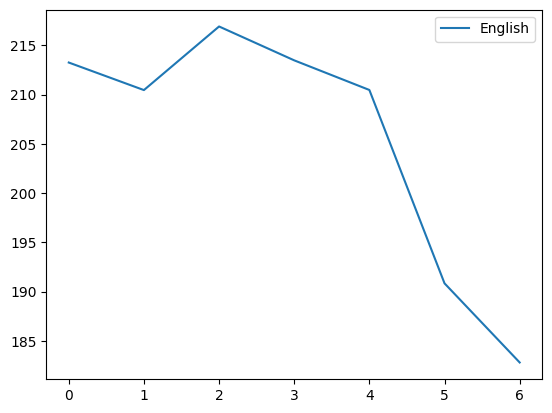

In [84]:
print(tsdf[['English']].groupby(tsdf.index.day_of_week).mean())
tsdf[['English']].groupby(tsdf.index.day_of_week).mean().plot()

            English  Tamil  EnglishS1  TamilS1
2015-07-01      165      0        NaN      NaN
2015-07-02      203      0      165.0      0.0
2015-07-03      131      0      203.0      0.0
2015-07-04      103      0      131.0      0.0
2015-07-05      112      0      103.0      0.0


<AxesSubplot:>

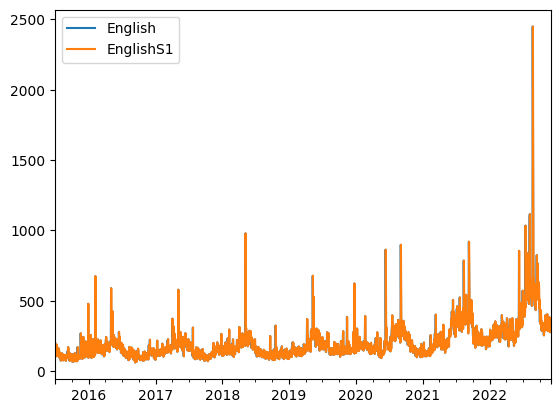

In [87]:
tsd = df[['English', 'Tamil']].copy()
tsd = pd.concat([tsd, tsd.shift(1).rename(columns={'English':'EnglishS1', 'Tamil':'TamilS1'})], axis=1)
print(tsd.head())
tsd[['English', 'EnglishS1']].plot()

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_4320\800473452.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tsd[['English', 'EnglishS1']]['Jan-2020'].plot()


<AxesSubplot:>

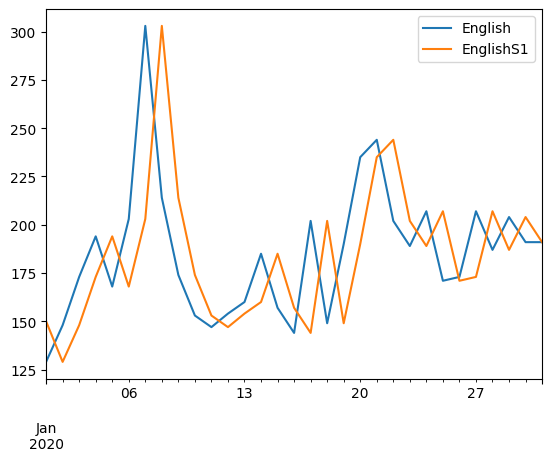

In [88]:
tsd[['English', 'EnglishS1']]['Jan-2020'].plot()

In [59]:
tsd = df[['English', 'Tamil']].copy()
tsd = pd.concat([tsd, tsd.shift(1).rename(columns={'English':'EnglishS1', 'Tamil':'TamilS1'}), tsd.shift(2).rename(columns={'English':'EnglishS2', 'Tamil':'TamilS2'}), tsd.shift(3).rename(columns={'English':'EnglishS3', 'Tamil':'TamilS3'})], axis=1)
print(tsd.head(7))

            English  Tamil  EnglishS1  TamilS1  EnglishS2  TamilS2  EnglishS3  \
2015-07-01      165      0        NaN      NaN        NaN      NaN        NaN   
2015-07-02      203      0      165.0      0.0        NaN      NaN        NaN   
2015-07-03      131      0      203.0      0.0      165.0      0.0        NaN   
2015-07-04      103      0      131.0      0.0      203.0      0.0      165.0   
2015-07-05      112      0      103.0      0.0      131.0      0.0      203.0   
2015-07-06      132      0      112.0      0.0      103.0      0.0      131.0   
2015-07-07      174      0      132.0      0.0      112.0      0.0      103.0   

            TamilS3  
2015-07-01      NaN  
2015-07-02      NaN  
2015-07-03      NaN  
2015-07-04      0.0  
2015-07-05      0.0  
2015-07-06      0.0  
2015-07-07      0.0  


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_4320\3619442405.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tsd[['English', 'EnglishS1', 'EnglishS2', 'EnglishS3']]['Dec-2020'].plot()


<AxesSubplot:>

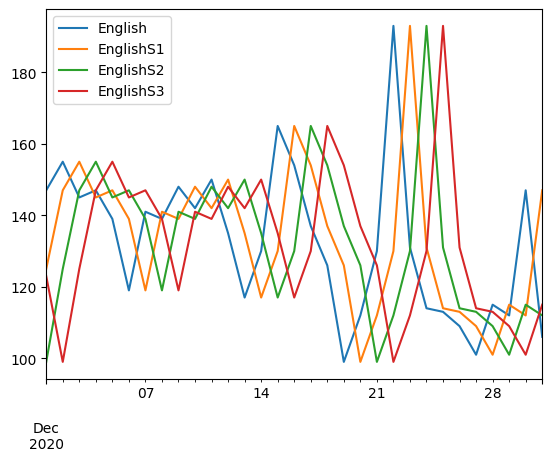

In [61]:
tsd[['English', 'EnglishS1', 'EnglishS2', 'EnglishS3']]['Dec-2020'].plot()

In [89]:
tsd = df[['English']].copy()

dfts = pd.concat([tsd, tsd.rolling(window=3).mean().rename(columns={'English':'EnglishR3Mean'}), tsd.rolling(window=3).min().rename(columns={'English':'EnglishR3Min'}), tsd.rolling(window=3).max().rename(columns={'English':'EnglishR3max'})], axis=1)
print(dfts.head(5))

            English  EnglishR3Mean  EnglishR3Min  EnglishR3max
2015-07-01      165            NaN           NaN           NaN
2015-07-02      203            NaN           NaN           NaN
2015-07-03      131     166.333333         131.0         203.0
2015-07-04      103     145.666667         103.0         203.0
2015-07-05      112     115.333333         103.0         131.0


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_4320\23665924.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dfts['Aug-2020'].plot()


<AxesSubplot:>

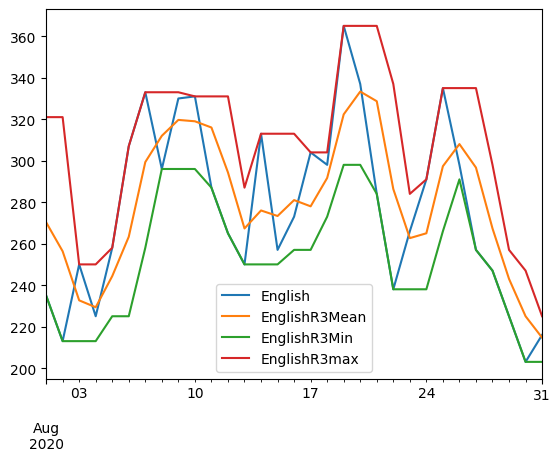

In [90]:
dfts['Aug-2020'].plot()

            English  EnglishS1  EnglishS1R2
2015-07-01      165        NaN          NaN
2015-07-02      203      165.0          NaN
2015-07-03      131      203.0        184.0
2015-07-04      103      131.0        167.0
2015-07-05      112      103.0        117.0
2015-07-06      132      112.0        107.5
2015-07-07      174      132.0        122.0


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_4320\868449294.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dfts['Dec-2020'].plot()


<AxesSubplot:>

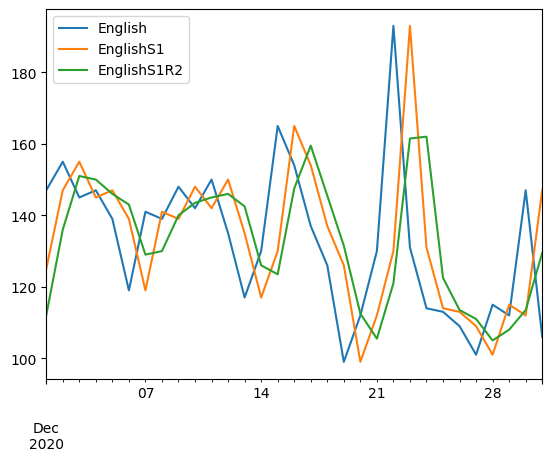

In [93]:
tsd = df[['English']].copy()
tsdsh = tsd.shift(1).rename(columns={'English':'EnglishS1', 'Tamil':'TamilS1'})
window = tsdsh.rolling(window=2).mean().rename(columns={'EnglishS1':'EnglishS1R2', 'TamilS1':'TamilS1R2'})
dfts = pd.concat([tsd, tsdsh, window], axis=1)
print(dfts.head(7))
dfts['Dec-2020'].plot()

            English  EnglishS2R3Mean  EnglishS2R3Min  EnglishS2R3max
2015-07-01      165              NaN             NaN             NaN
2015-07-02      203              NaN             NaN             NaN
2015-07-03      131              NaN             NaN             NaN
2015-07-04      103              NaN             NaN             NaN
2015-07-05      112       166.333333           131.0           203.0


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_4320\64620575.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dfts['Dec-2020'].plot()


<AxesSubplot:>

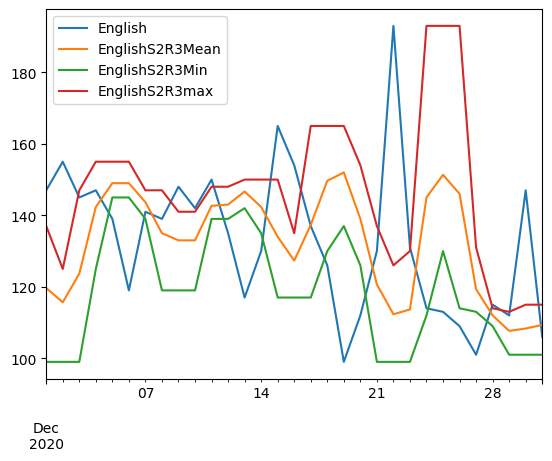

In [97]:
tsd = df[['English']].copy()
tsdsh = tsd.shift(2).rename(columns={'English':'EnglishS2'})

dfts = pd.concat([tsd, tsdsh.rolling(window=3).mean().rename(columns={'EnglishS2':'EnglishS2R3Mean'}), tsdsh.rolling(window=3).min().rename(columns={'EnglishS2':'EnglishS2R3Min'}), tsdsh.rolling(window=3).max().rename(columns={'EnglishS2':'EnglishS2R3max'})], axis=1)
print(dfts.head(5))
dfts['Dec-2020'].plot()

            English  EnglishS1ExMean
2015-07-01      165              NaN
2015-07-02      203       165.000000
2015-07-03      131       184.000000
2015-07-04      103       166.333333
2015-07-05      112       150.500000


<AxesSubplot:>

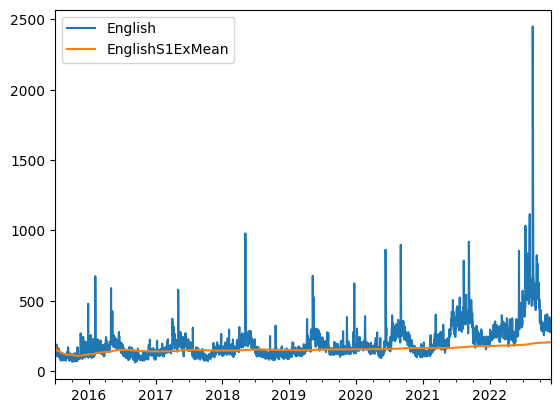

In [108]:
tsd = df[['English']].copy()
tsdsh = tsd.shift(1).rename(columns={'English':'EnglishS1'})

dfts = pd.concat([tsd, tsdsh.expanding().mean().rename(columns={'EnglishS1':'EnglishS1ExMean'})], axis=1)
print(dfts.head(5))
dfts.plot()

## Visualisation

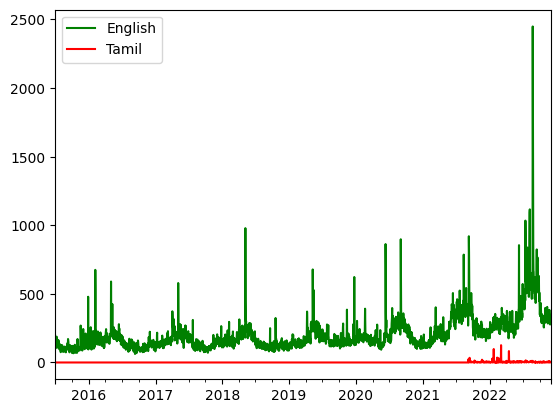

In [112]:
tsd = df[['English', 'Tamil']].copy()
tsd.plot( color=['green', 'red'])
plt.show()

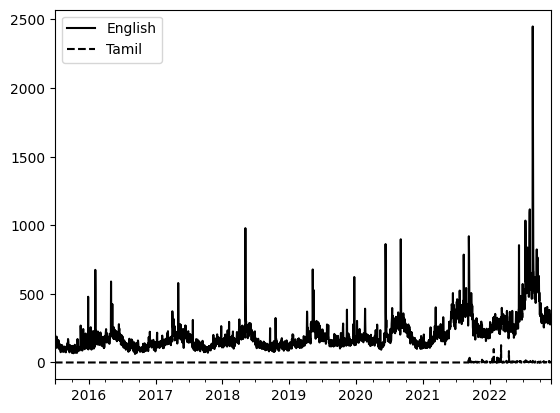

In [113]:
tsd.plot(style=['k-','k--'])
plt.show()


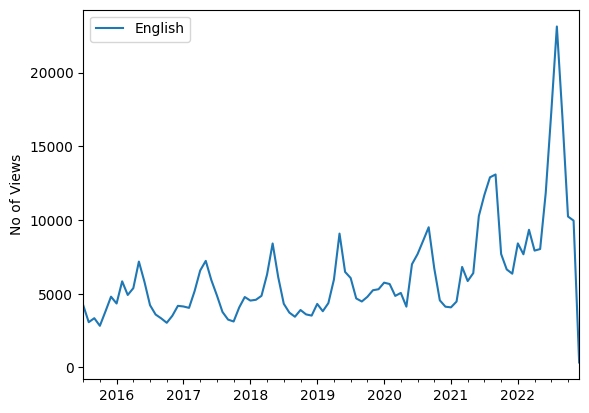

In [122]:
tsd[['English']].resample('M').sum().plot()
plt.ylabel("No of Views")
plt.show()


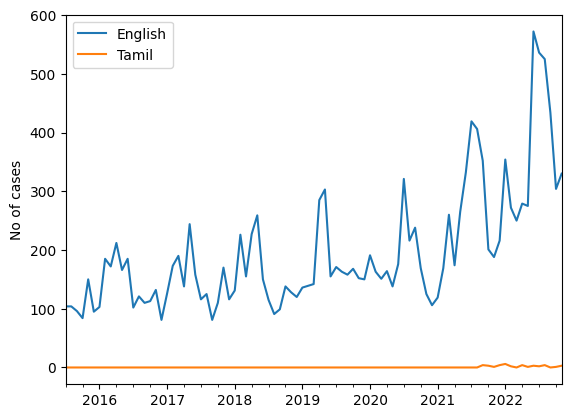

In [116]:
tsd.asfreq('M').plot()
plt.ylabel("No of cases")
plt.show()


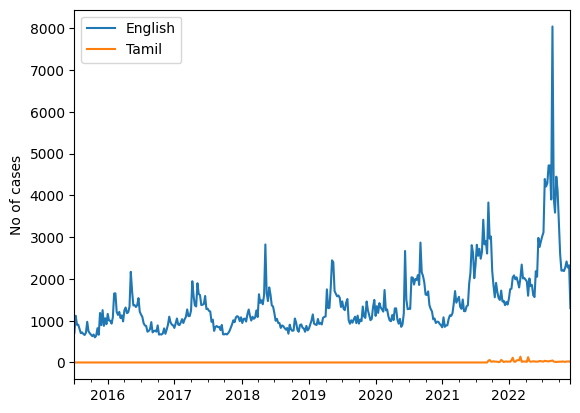

In [123]:
tsd.resample('W').sum().plot()
plt.ylabel("No of cases")
plt.show()


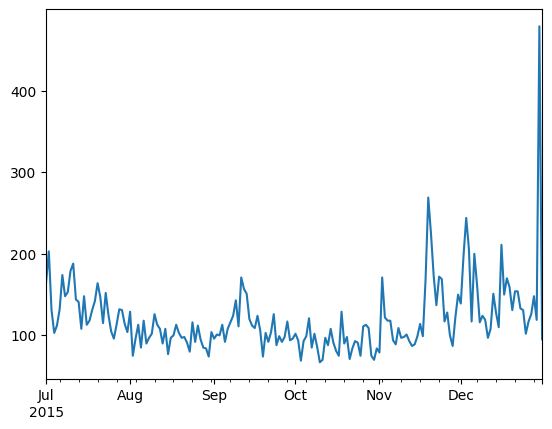

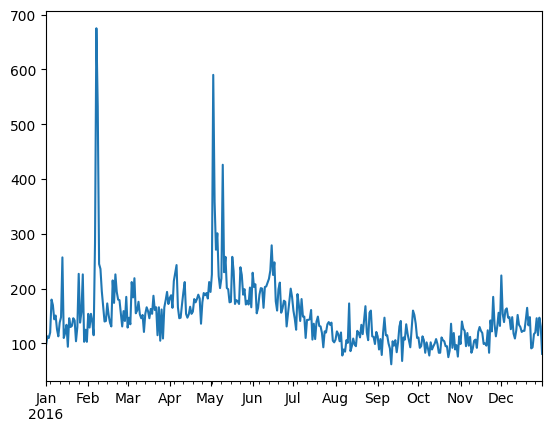

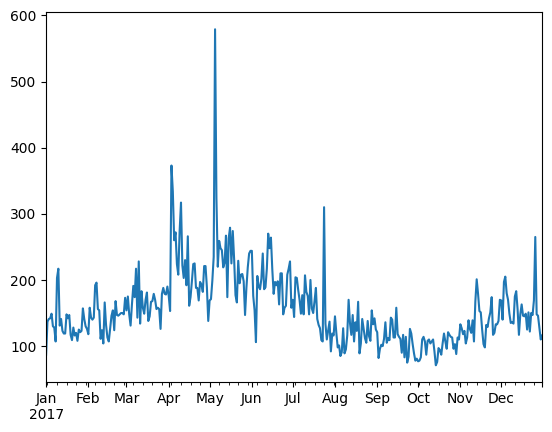

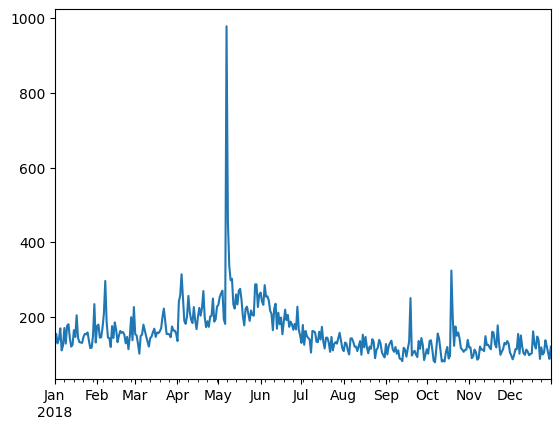

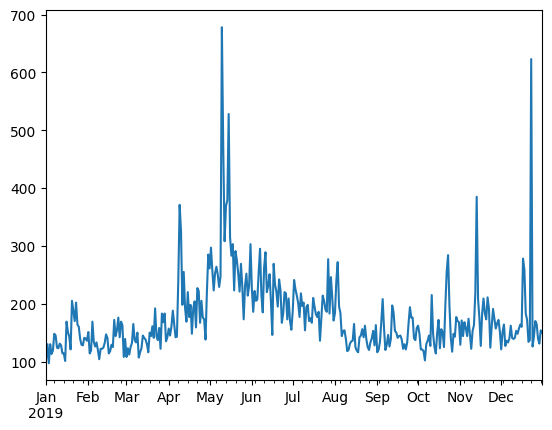

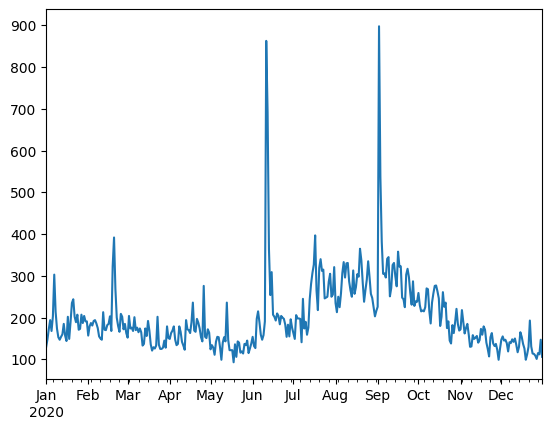

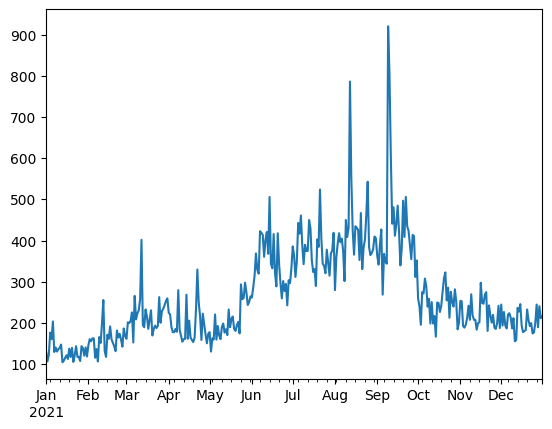

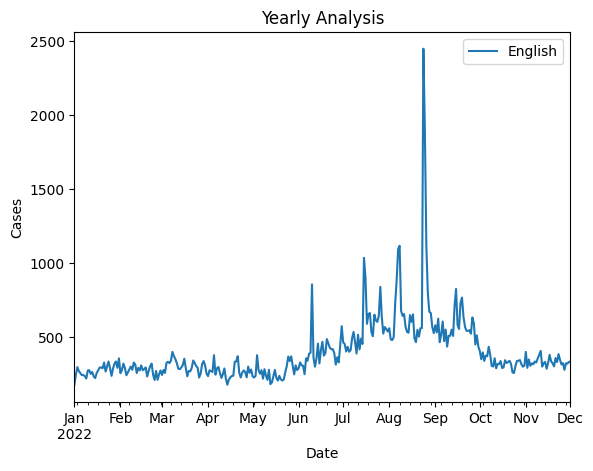

In [124]:

groups = tsd[['English']].groupby(by=[tsd.index.year], sort = True)
groups.plot(subplots=True, legend=False)
plt.title("Yearly Analysis")
plt.ylabel("Cases")
plt.xlabel("Date")
plt.legend()
   

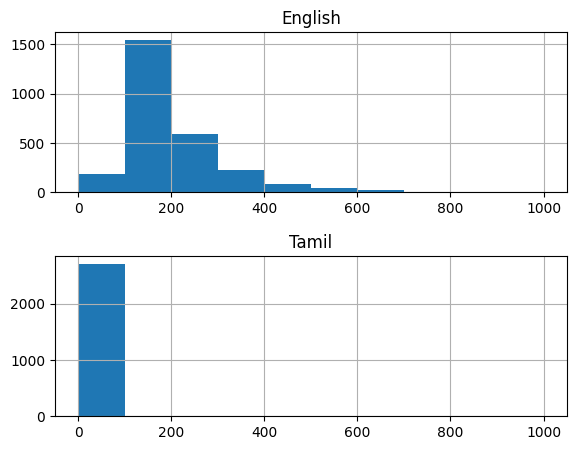

In [57]:
plt.subplot(2,1,1)
tsd['English'].hist(range=[0,1000])
plt.title("English")
plt.subplot(2,1,2)
tsd['Tamil'].hist(range=[0,1000])
plt.title("Tamil")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()

<AxesSubplot:ylabel='Density'>

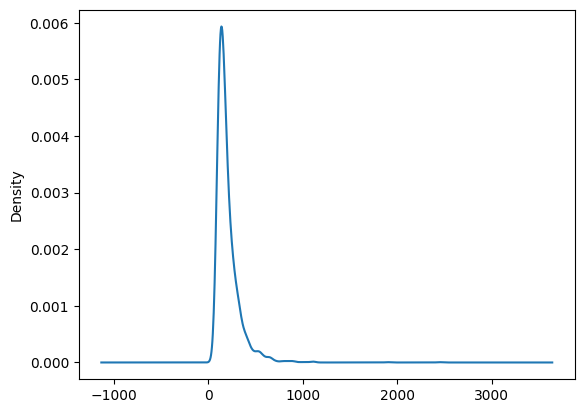

In [65]:
tsd['English'].plot(kind='kde')

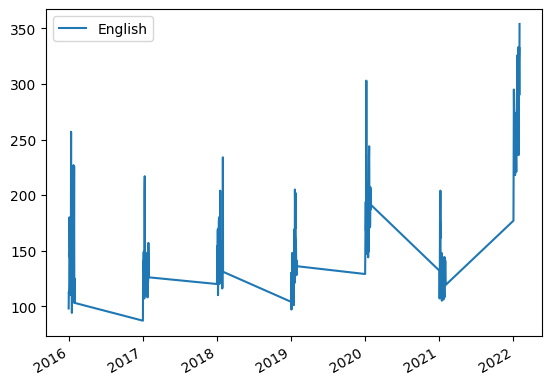

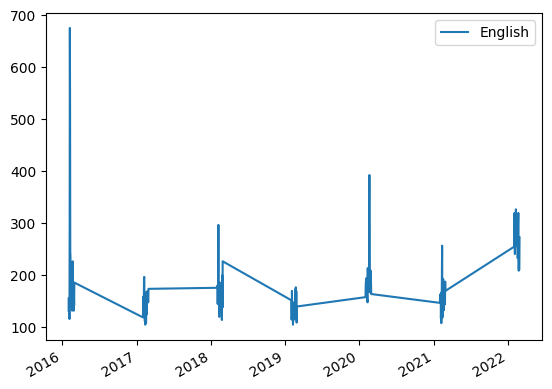

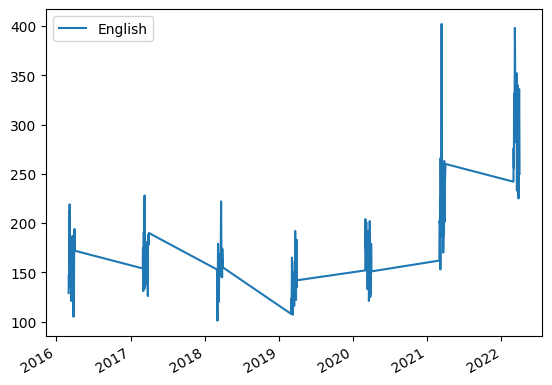

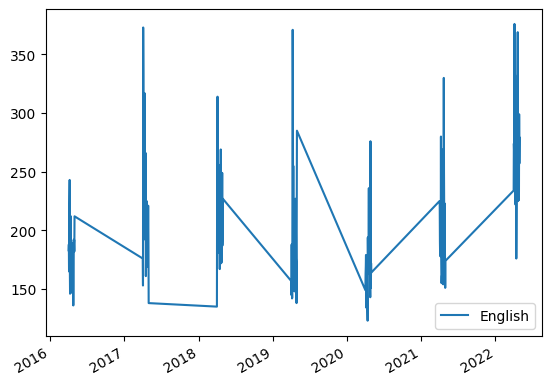

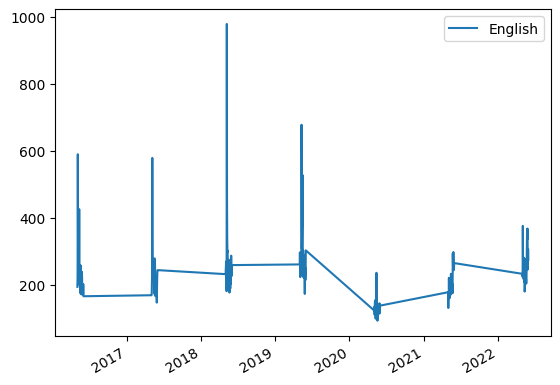

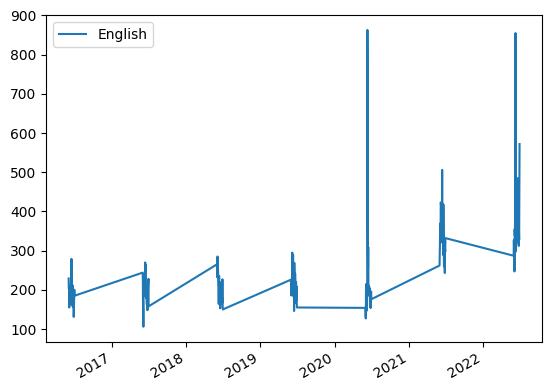

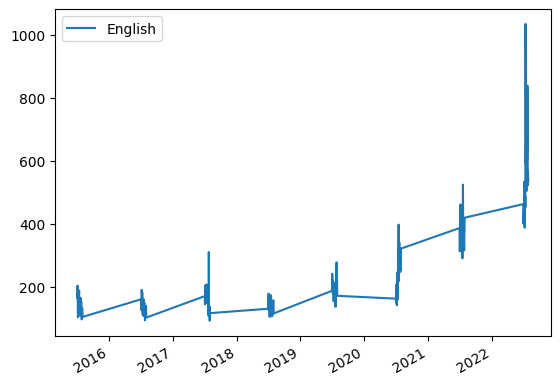

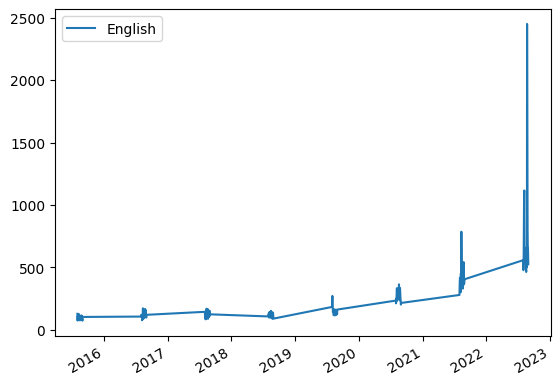

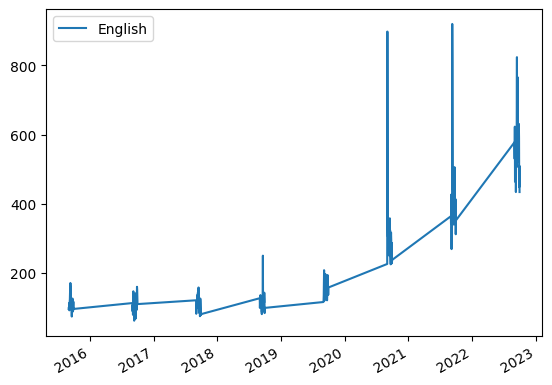

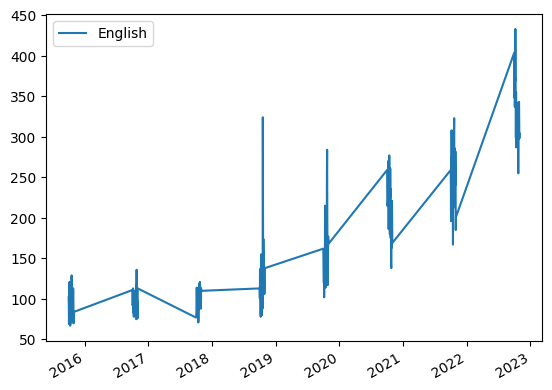

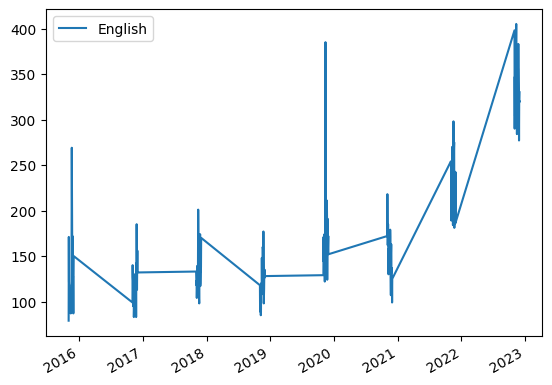

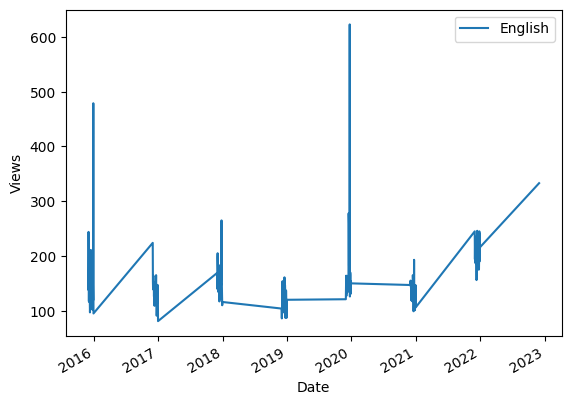

In [134]:
groups = tsd[['English']].groupby(by=[tsd.index.month], sort = True)
groups.plot(subplots=True)
plt.ylabel("Views")
plt.xlabel("Date")
plt.subplots_adjust(hspace=0)
plt.show()

<AxesSubplot:ylabel='English'>

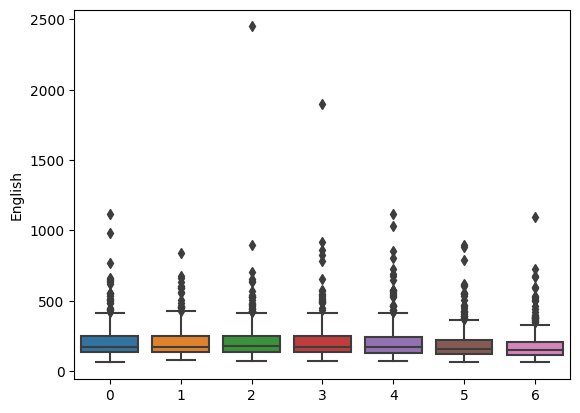

In [135]:
sns.boxplot(data = tsd, x=tsd.index.weekday,y ='English')

<AxesSubplot:ylabel='English'>

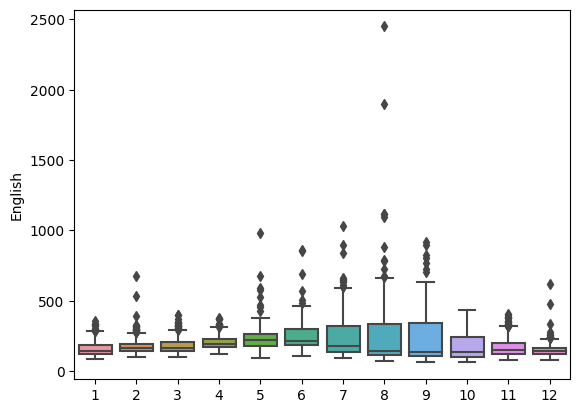

In [136]:
sns.boxplot(data = tsd, x=tsd.index.month,y ='English')

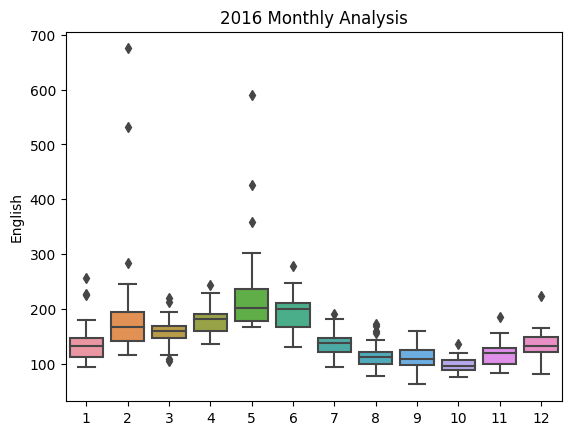

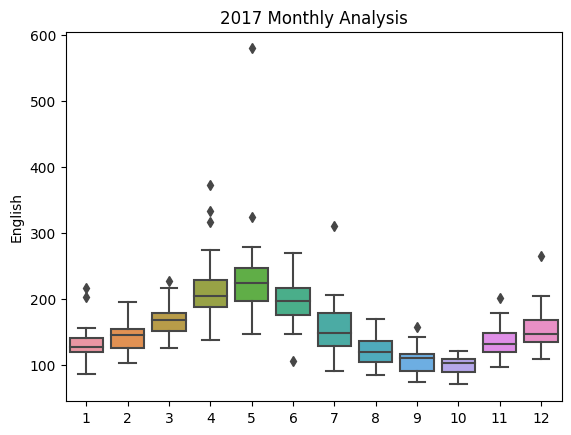

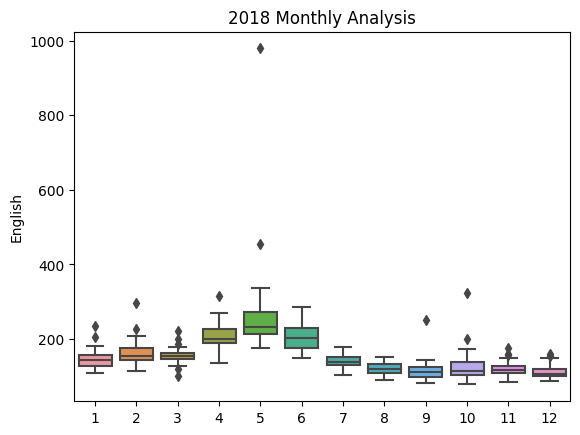

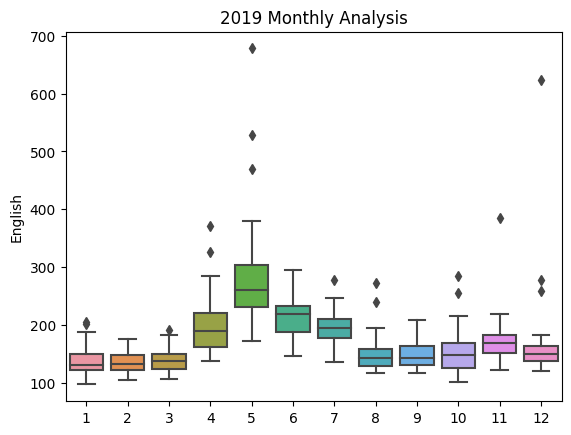

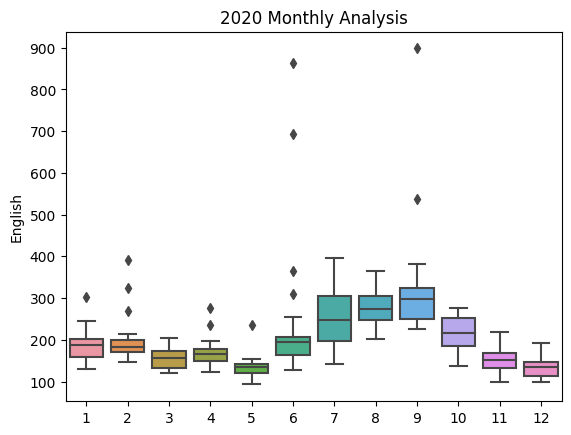

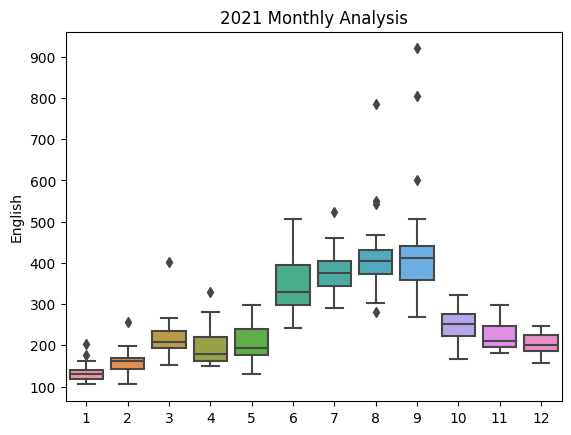

In [137]:
for yr in range(2016, 2022):
    tsd2 = tsd[tsd.index.year == yr]
    sns.boxplot(data = tsd2, x=tsd2.index.month ,y ='English')
    plt.title((str(yr) + " Monthly Analysis"))
    plt.show()


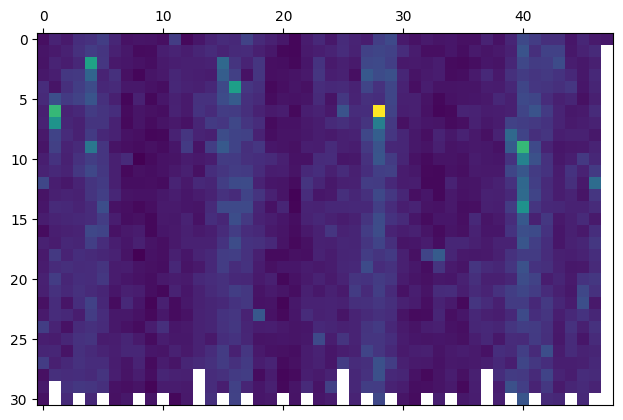

In [138]:
one_year = tsd['English']['01-01-2016':'01-Dec-2019']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = pd.date_range(start="1/Dec/2015", end="1/Dec/2019", freq='M')
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

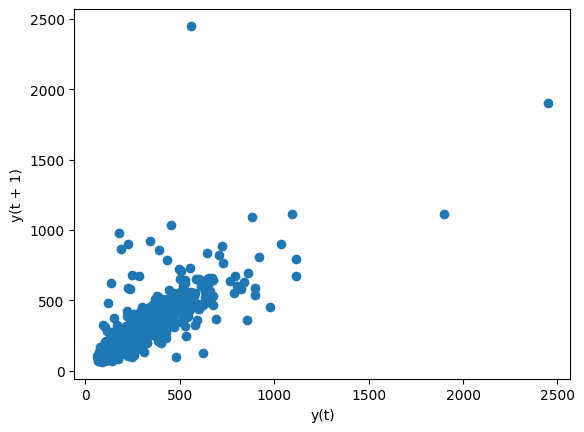

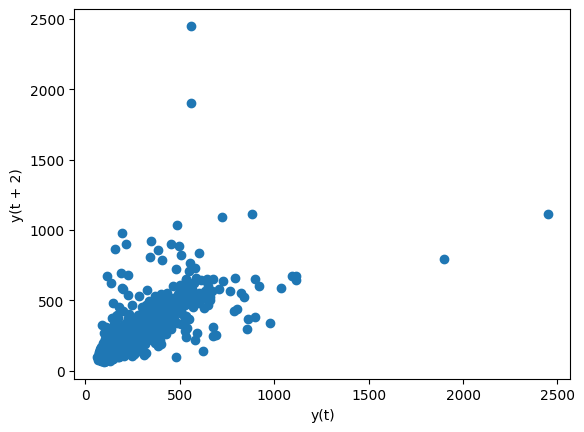

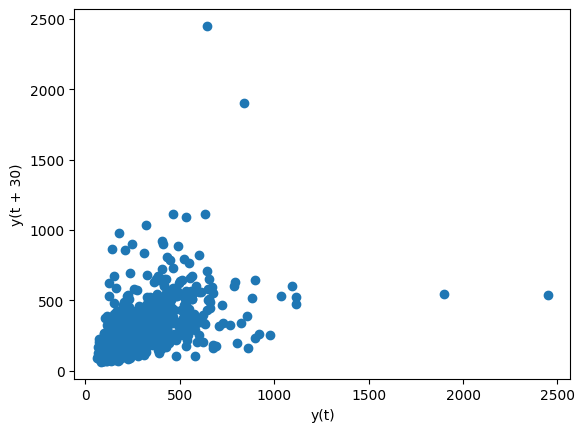

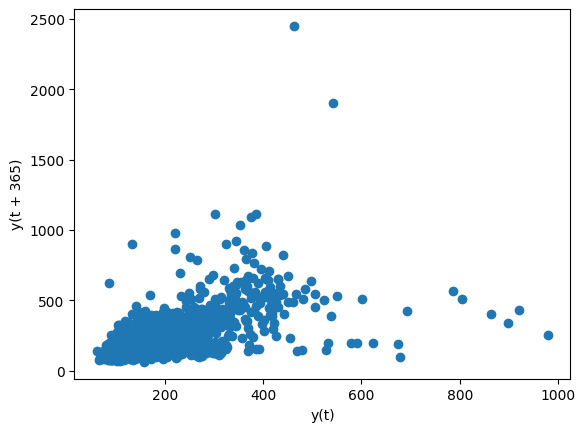

In [90]:
pd.plotting.lag_plot(tsd['English'], lag=1)
plt.show("Lag Plot t vs t+1")
plt.show()
pd.plotting.lag_plot(tsd['English'], lag=2)
plt.show("Lag Plot t vs t+2")
plt.show()
pd.plotting.lag_plot(tsd['English'], lag=30)
plt.show("Lag Plot t vs t+30")
plt.show()
pd.plotting.lag_plot(tsd['English'], lag=365)
plt.show("Lag Plot t vs t+365")
plt.show()
# High Positive Correlation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


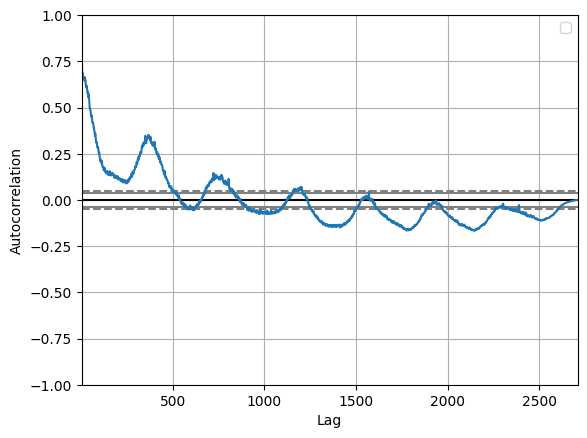

In [96]:
pd.plotting.autocorrelation_plot(tsd['English'])
# highest when lag = 1, 365*n days yearly
plt.legend()

## Resampling and Interpolation

In [92]:
tsd.resample('H').mean()

,English,Tamil
2015-07-01 00:00:00,165.0,0.0
2015-07-01 01:00:00,NaN,NaN
2015-07-01 02:00:00,NaN,NaN
2015-07-01 03:00:00,NaN,NaN
2015-07-01 04:00:00,NaN,NaN
...,...,...
2022-11-30 20:00:00,NaN,NaN
2022-11-30 21:00:00,NaN,NaN
2022-11-30 22:00:00,NaN,NaN
2022-11-30 23:00:00,NaN,NaN


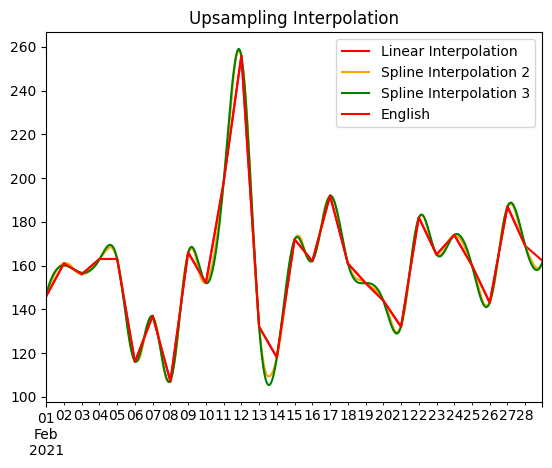

In [98]:
tsd.resample('H').mean().interpolate(method='linear')['English']['Feb-2021'].plot(color='Red', label="Linear Interpolation")
tsd.resample('H').mean().interpolate(method='spline', order=2)['English']['Feb-2021'].plot(color='Orange', label="Spline Interpolation 2")
tsd.resample('H').mean().interpolate(method='spline', order=3)['English']['Feb-2021'].plot(color='Green', label="Spline Interpolation 3")
tsd['English']['Feb-2021'].plot(color='Red')
plt.title("Upsampling Interpolation")
plt.legend()

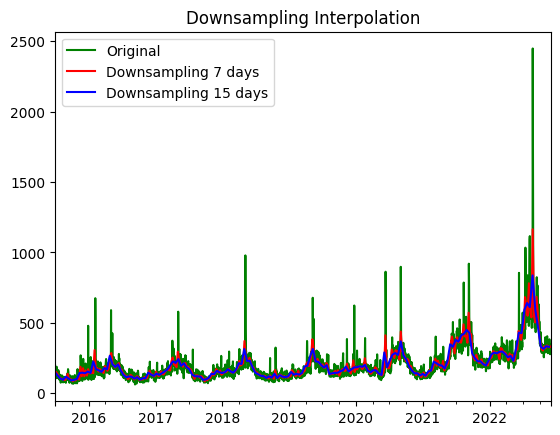

In [101]:
tsd['English'].plot(color='Green', label="Original")
tsd['English'].resample('7D').mean().plot(color='Red', label="Downsampling 7 days")
tsd['English'].resample('15D').mean().plot(color='Blue', label="Downsampling 15 days")
plt.title("Downsampling Interpolation")
plt.legend()

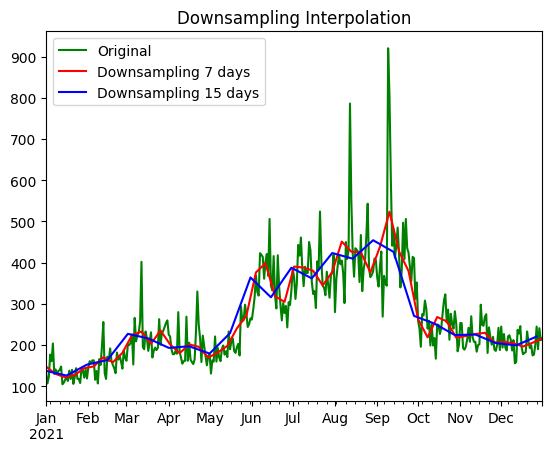

In [102]:
tsd['English']['2021'].plot(color='Green', label="Original")
tsd['English']['2021'].resample('7D').mean().plot(color='Red', label="Downsampling 7 days")
tsd['English']['2021'].resample('15D').mean().plot(color='Blue', label="Downsampling 15 days")
plt.title("Downsampling Interpolation")
plt.legend()

## Power Transformation

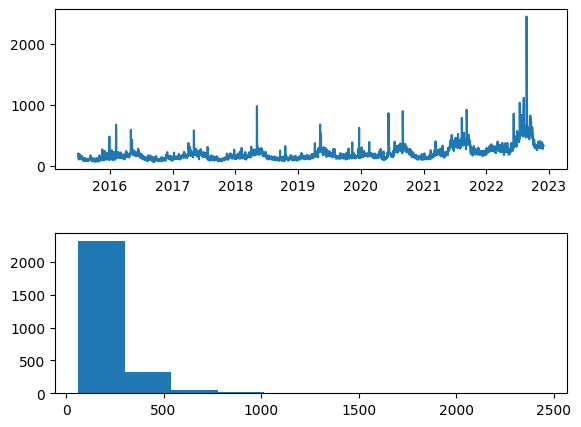

In [103]:
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(tsd['English'])
# histogram
plt.subplot(212)
plt.hist(tsd['English'])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()

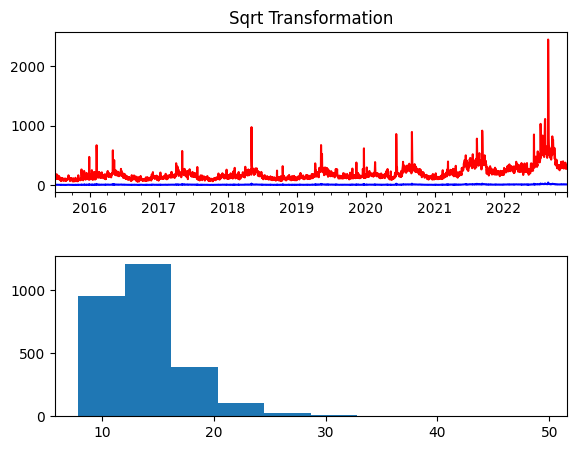

In [104]:
plt.subplot(211)
np.sqrt(tsd['English']).plot(color='Blue')
tsd['English'].plot(color='Red')
plt.title("Sqrt Transformation")
plt.subplot(212)
plt.hist(np.sqrt(tsd['English']))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()

In [105]:

print('for Sqrt data Results of Dickey-Fuller Test:')
dftest = adfuller(np.sqrt(tsd['English']), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


for Sqrt data Results of Dickey-Fuller Test:
Test Statistic                   -2.307905
p-value                           0.169431
#Lags Used                       27.000000
Number of Observations Used    2683.000000
Critical Value (1%)              -3.432790
Critical Value (5%)              -2.862618
Critical Value (10%)             -2.567344
dtype: float64


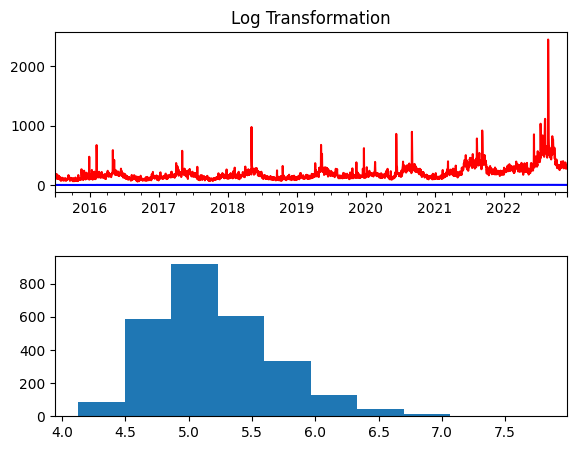

In [109]:
plt.subplot(211)
np.log(tsd['English']).plot(color='Blue', label="Log Transformed")
tsd['English'].plot(color='Red', label="Original")
plt.title("Log Transformation")
plt.subplot(212)
plt.hist(np.log(tsd['English']))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()


In [110]:
print('for Log Trans data Results of Dickey-Fuller Test:')
dftest = adfuller(np.log(tsd['English']), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


for Log Trans data Results of Dickey-Fuller Test:
Test Statistic                   -2.266877
p-value                           0.182873
#Lags Used                       28.000000
Number of Observations Used    2682.000000
Critical Value (1%)              -3.432791
Critical Value (5%)              -2.862618
Critical Value (10%)             -2.567344
dtype: float64


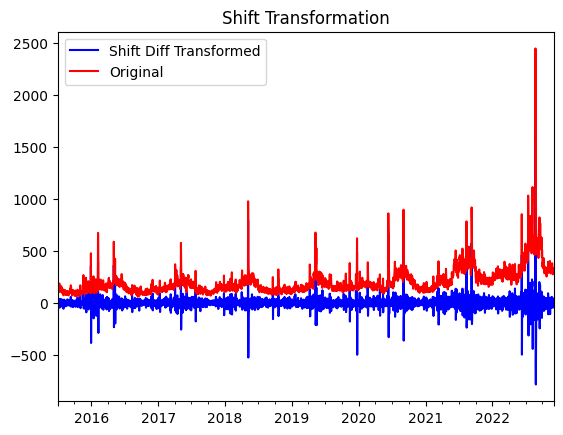

In [140]:
((tsd['English']).diff(1)).plot(color='Blue', label="Shift Diff Transformed")
tsd['English'].plot(color='Red', label="Original")
plt.title("Shift Transformation")
plt.legend()


In [146]:
print('for Shift Diff Trans data Results of Dickey-Fuller Test:')
dftest = adfuller((tsd['English']).diff(1).fillna(0), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


for Shift Diff Trans data Results of Dickey-Fuller Test:
Test Statistic                -1.852764e+01
p-value                        2.104971e-30
#Lags Used                     1.900000e+01
Number of Observations Used    2.691000e+03
Critical Value (1%)           -3.432782e+00
Critical Value (5%)           -2.862615e+00
Critical Value (10%)          -2.567342e+00
dtype: float64


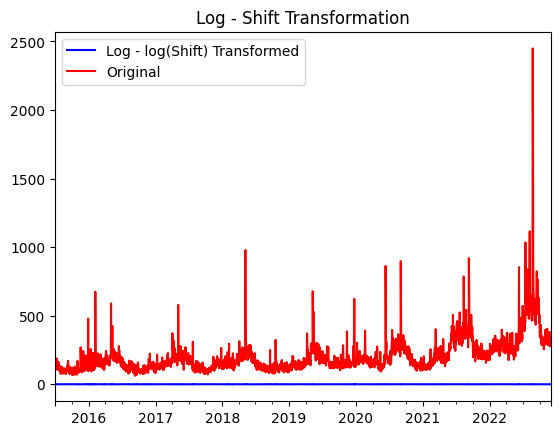

In [141]:
(np.log(tsd['English']) - np.log(tsd['English']).shift()).plot(color='Blue', label="Log - log(Shift) Transformed")
tsd['English'].plot(color='Red', label="Original")
plt.title("Log - Shift Transformation")
plt.legend()


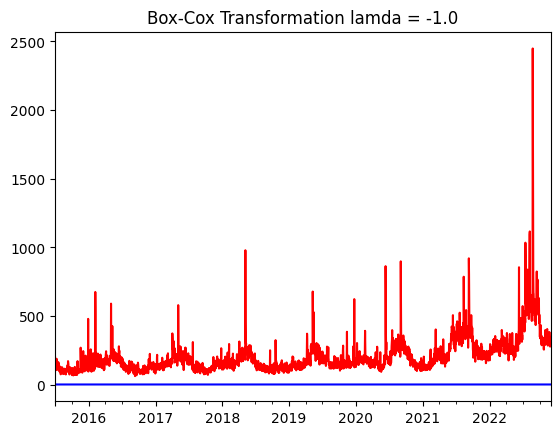

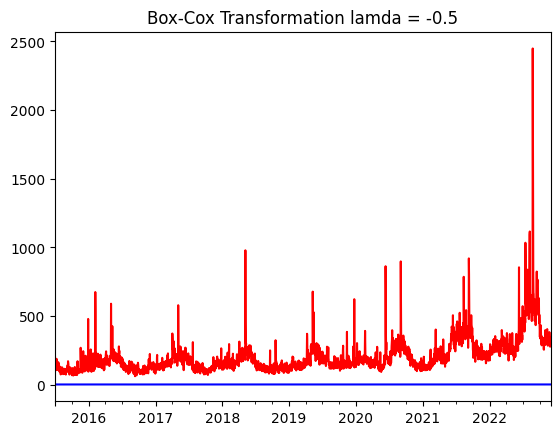

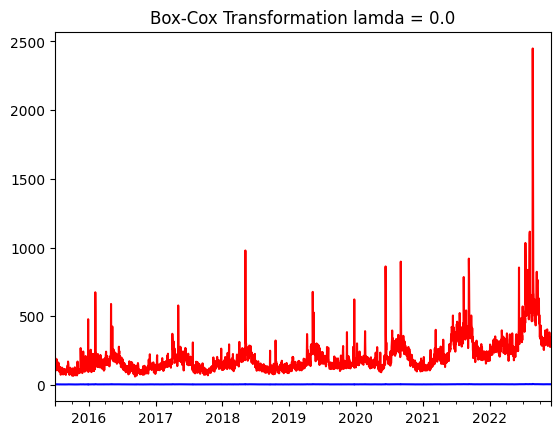

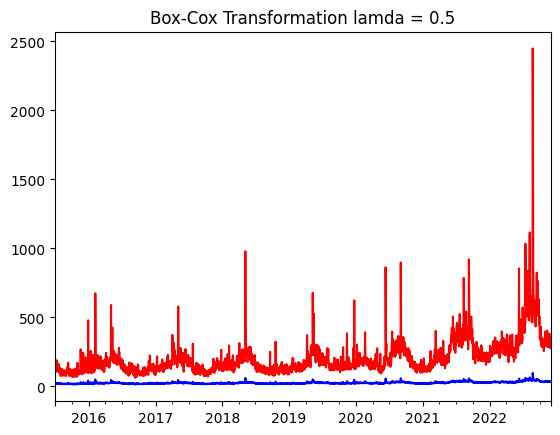

In [142]:
from scipy.stats import boxcox
for i in np.arange(-1,1,0.5):
    boxcox(tsd['English'], lmbda=i).plot(color='Blue')
    tsd['English'].plot(color='Red')
    plt.title(str("Box-Cox Transformation lamda = "+ str(i)))
    plt.show()

In [143]:
print('for normal data Results of Dickey-Fuller Test:')
dftest = adfuller(tsd['English'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


for normal data Results of Dickey-Fuller Test:
Test Statistic                   -2.732637
p-value                           0.068559
#Lags Used                       20.000000
Number of Observations Used    2690.000000
Critical Value (1%)              -3.432783
Critical Value (5%)              -2.862615
Critical Value (10%)             -2.567342
dtype: float64


## Moving Average Smoothing

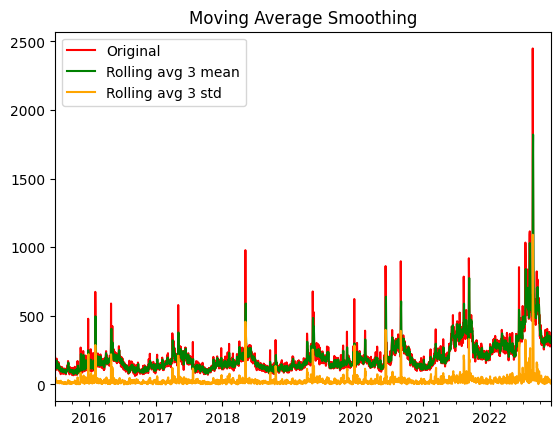

In [118]:
tsd['English'].plot(color='Red', label="Original")
tsd['English'].rolling(window=3).mean().plot(color='Green', label="Rolling avg 3 mean")
tsd['English'].rolling(window=3).std().plot(color='Orange', label="Rolling avg 3 std")
plt.title("Moving Average Smoothing")
plt.legend()

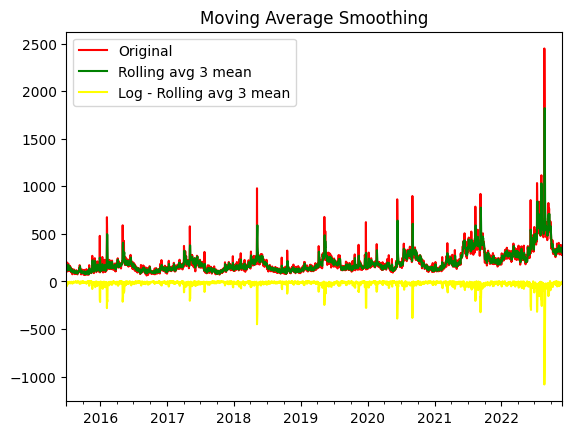

In [119]:
tsd['English'].plot(color='Red', label="Original")
tsd['English'].rolling(window=3).mean().plot(color='Green', label="Rolling avg 3 mean")
(np.log(tsd['English']) - tsd['English'].rolling(window=3).std()).plot(color='Yellow', label="Log - Rolling avg 3 mean")
plt.title("Moving Average Smoothing")
plt.legend()

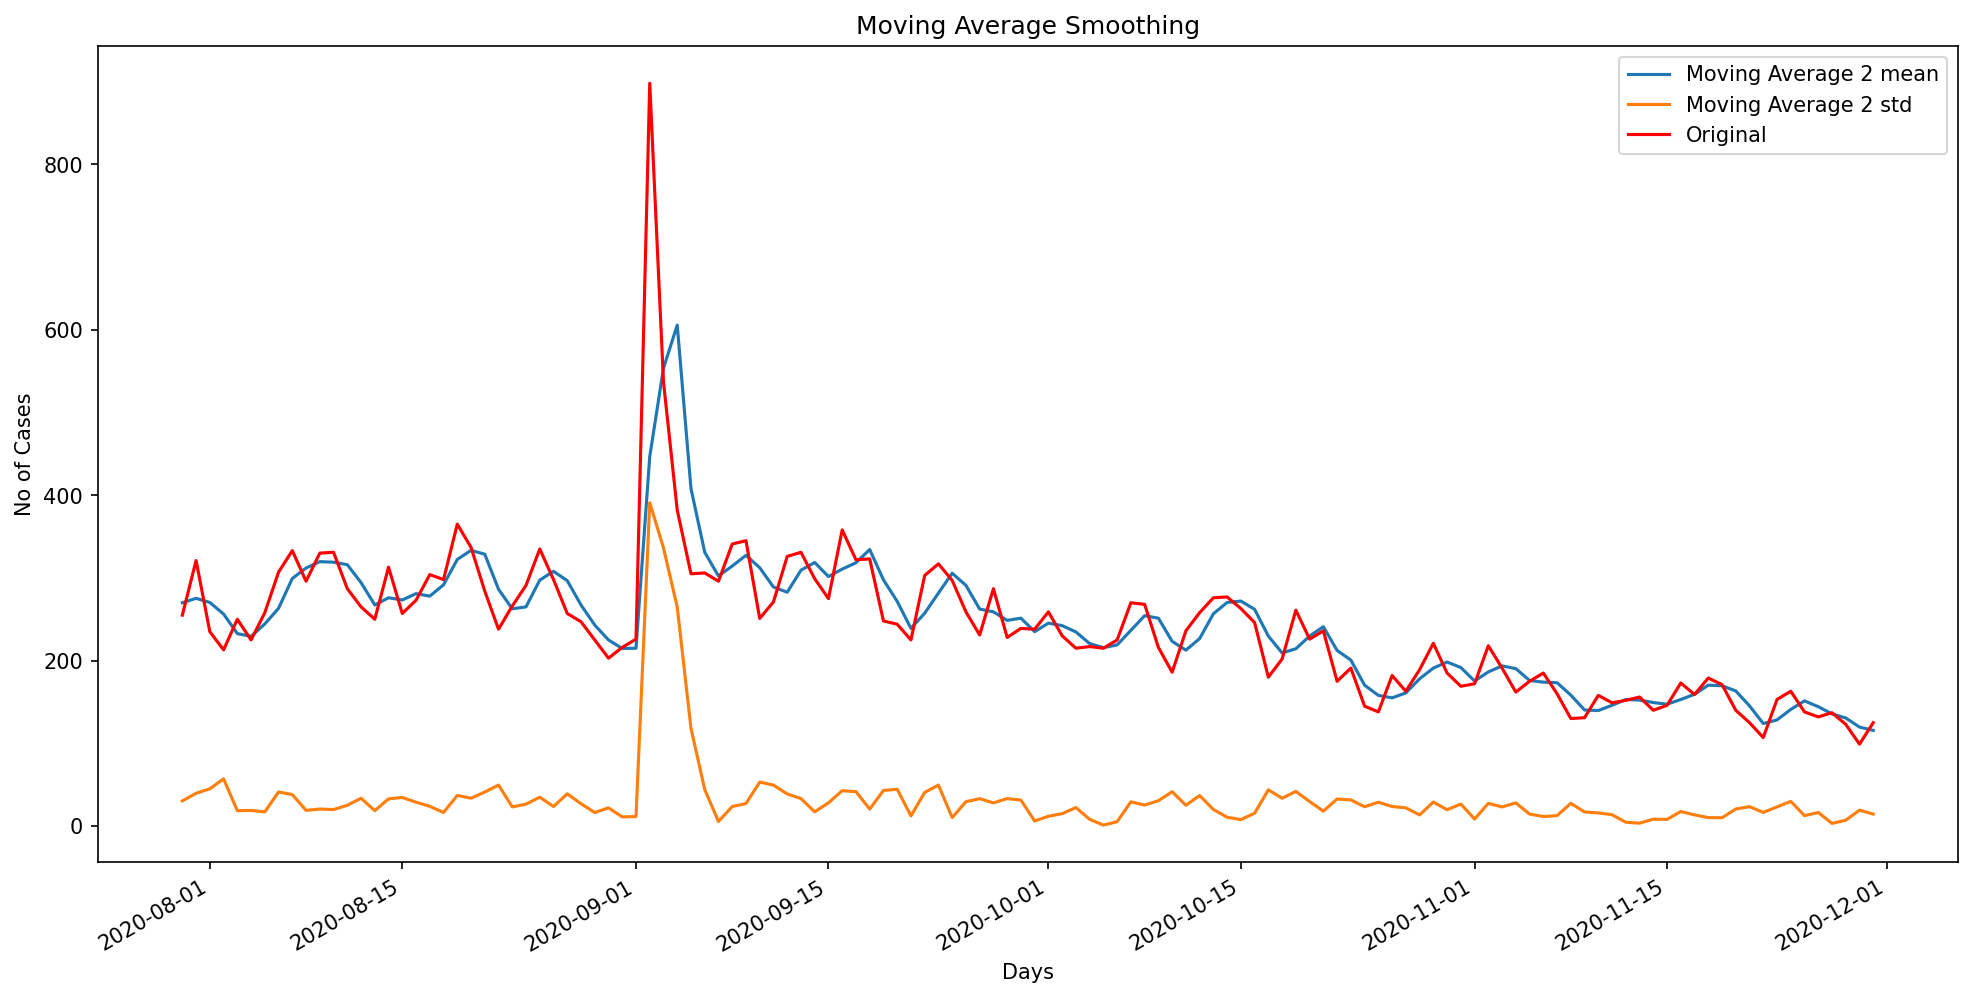

In [120]:
plt.figure(figsize=(16, 8), dpi=150) 
x = pd.date_range(start='30/Jul/2020', end='30/Nov/2020', freq='D')

y = tsd['English'].rolling(window=3).mean()['30/Jul/2020':'30/Nov/2020']
plt.plot(x, y, label="Moving Average 2 mean")
y = tsd['English'].rolling(window=3).std()['30/Jul/2020':'30/Nov/2020']
plt.plot(x, y, label="Moving Average 2 std")
tsd['English']['30/Jul/2020':'30/Nov/2020'].plot(color='Red', label="Original")

plt.title("Moving Average Smoothing")
plt.xlabel('Days') 
plt.ylabel('No of Cases')
plt.legend()


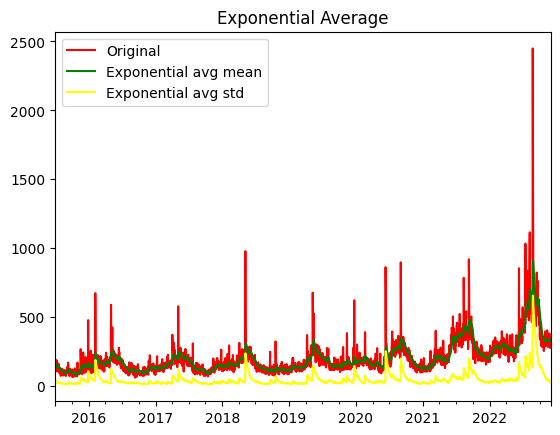

In [121]:
tsd['English'].plot(color='Red', label="Original")
tsd['English'].ewm(alpha=0.1).mean().plot(color='Green', label="Exponential avg mean")
tsd['English'].ewm(alpha=0.1).std().plot(color='Yellow', label="Exponential avg std")
plt.title("Exponential Average")
plt.legend()

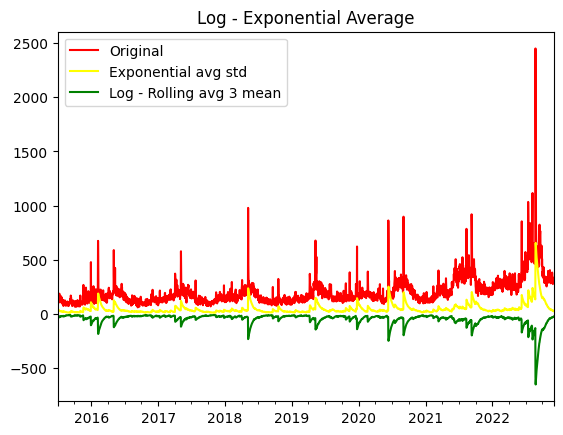

In [124]:
tsd['English'].plot(color='Red', label="Original")
tsd['English'].ewm(alpha=0.1).std().plot(color='Yellow', label="Exponential avg std")
(np.log(tsd['English']) - tsd['English'].ewm(alpha=0.1).std()).plot(color='Green', label="Log - Rolling avg 3 mean")
plt.title("Log - Exponential Average")
plt.legend()

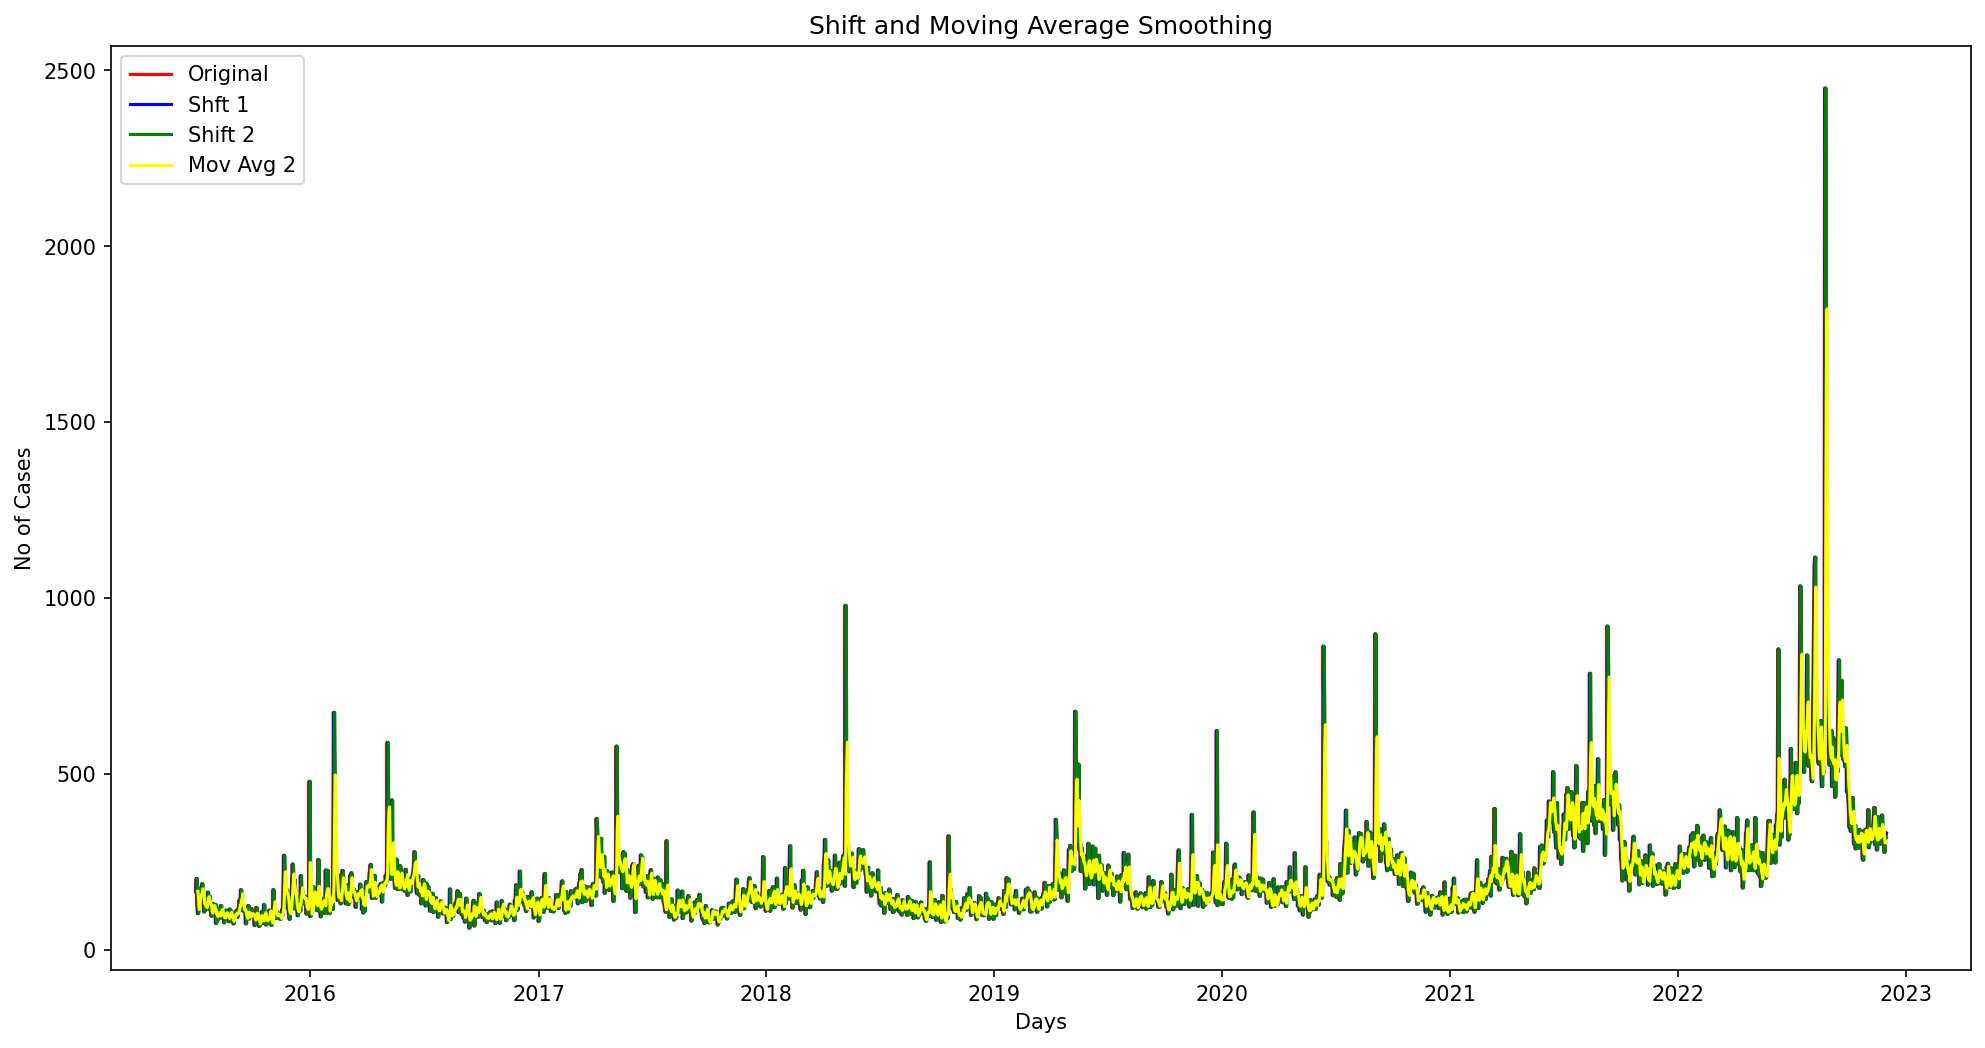

In [125]:
plt.figure(figsize=(16, 8), dpi=150) 

width = 3
plt.plot(tsd['English'], color='Red', label="Original")
plt.plot(tsd['English'].shift(1), color='Blue', label="Shft 1")
plt.plot(tsd['English'].shift(width - 1), color='Green', label="Shift 2")

plt.plot(tsd['English'].shift(width - 1).rolling(window=width).mean(), color='Yellow', label="Mov Avg 2")
plt.title("Shift and Moving Average Smoothing")
plt.xlabel('Days') 
plt.ylabel('No of Cases')
plt.legend()

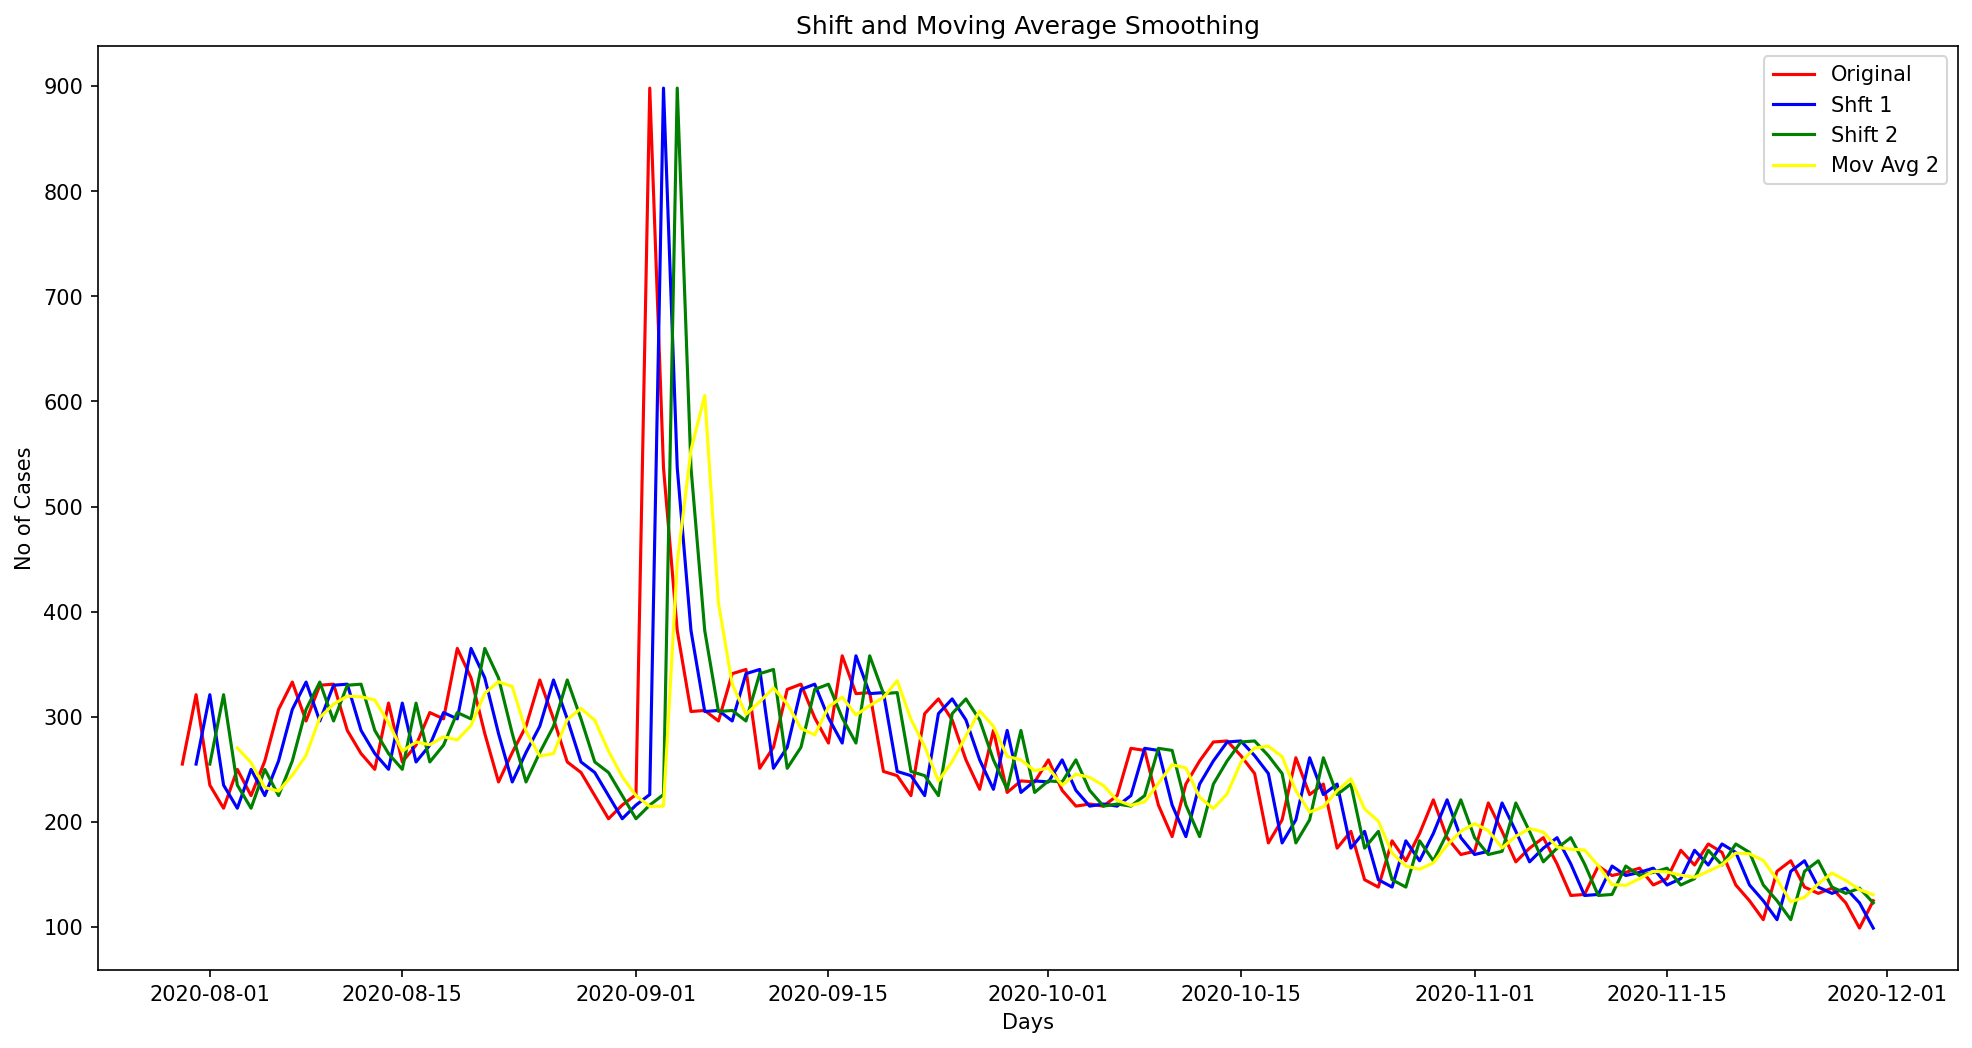

In [126]:
plt.figure(figsize=(16, 8), dpi=150) 

width = 3
plt.plot(tsd['English']['30/Jul/2020':'30/Nov/2020'], color='Red', label="Original")
plt.plot(tsd['English']['30/Jul/2020':'30/Nov/2020'].shift(1), color='Blue', label="Shft 1")
plt.plot(tsd['English']['30/Jul/2020':'30/Nov/2020'].shift(width - 1), color='Green', label="Shift 2")

plt.plot(tsd['English']['30/Jul/2020':'30/Nov/2020'].shift(width - 1).rolling(window=width).mean(), color='Yellow', label="Mov Avg 2")
plt.title("Shift and Moving Average Smoothing")
plt.xlabel('Days') 
plt.ylabel('No of Cases')
plt.legend()

predicted=166.333333, expected=103.000000
predicted=145.666667, expected=112.000000
predicted=115.333333, expected=132.000000
predicted=115.666667, expected=174.000000
predicted=139.333333, expected=148.000000
predicted=151.333333, expected=153.000000
predicted=158.333333, expected=179.000000
predicted=160.000000, expected=188.000000
predicted=173.333333, expected=144.000000
predicted=170.333333, expected=141.000000
predicted=157.666667, expected=108.000000
predicted=131.000000, expected=148.000000
predicted=132.333333, expected=113.000000
predicted=123.000000, expected=118.000000
predicted=126.333333, expected=131.000000
predicted=120.666667, expected=142.000000
predicted=130.333333, expected=164.000000
predicted=145.666667, expected=147.000000
predicted=151.000000, expected=115.000000
predicted=142.000000, expected=152.000000
predicted=138.000000, expected=125.000000
predicted=130.666667, expected=105.000000
predicted=127.333333, expected=96.000000
predicted=108.666667, expected=113.

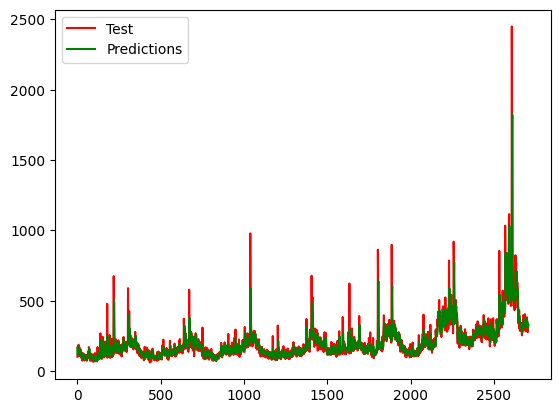

In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = tsd['English']
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
print('Test MAE: %.3f' % np.sqrt(mean_absolute_error(test, predictions)))
print('Test MSE: %.3f' % (mean_squared_error(test, predictions)))
print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, predictions)))
print('R2 Square: %.3f' % np.sqrt(r2_score(test, predictions)))

plt.plot(test, color='Red', label="Test")
plt.plot(predictions, color='Green', label="Predictions")
plt.legend()

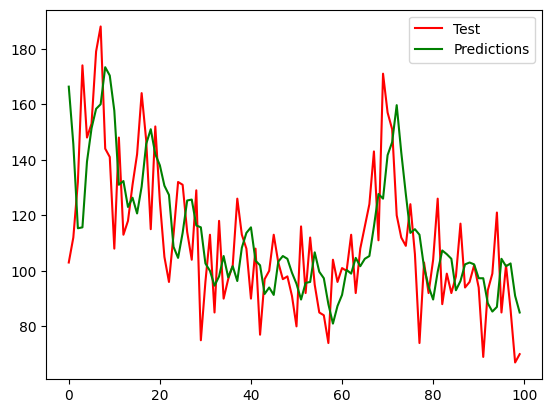

In [149]:
# zoom plot
plt.plot(test[:100],color='Red', label="Test")
plt.plot(predictions[:100], color='Green', label="Predictions")
plt.legend()